In [2]:
import numpy as np
import os
import keras
import librosa
import matplotlib.pyplot as plt
import skimage.io

DATA_SET_FOLDER = 'D:\DATASETS\\fma_small'
IMAGE_DATASET_FOLDER = 'D:\DATASETS\Spectrogram_images'

In [3]:
y0, sr0 = librosa.load('000002.mp3')
y1, sr1 = librosa.load('026010.mp3')

In [21]:
mel = librosa.feature.melspectrogram(y=y0, sr=sr0,n_fft=2048, hop_length=512)
mel = librosa.power_to_db(mel, ref=np.max)


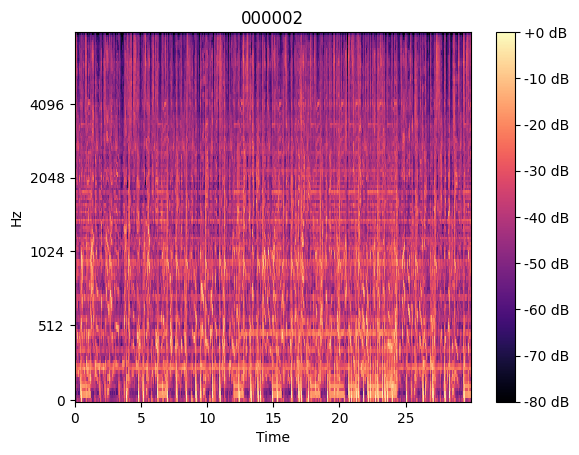

In [22]:
librosa.display.specshow(mel, y_axis='mel', fmax=8000, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title(str('000002'))
plt.show()


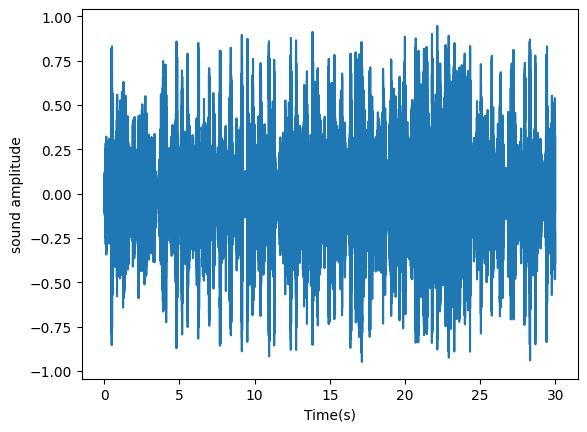

In [23]:
time = np.arange(0,len(y0))/sr0
fig, ax = plt.subplots()
ax.plot(time,y0)
ax.set(xlabel='Time(s)',ylabel='sound amplitude')
plt.show()

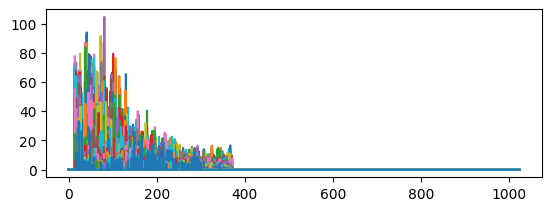

In [43]:
pitches, magnitudes = librosa.piptrack(y=y0, sr=sr0)

plt.subplot(212)
plt.plot(magnitudes)

plt.show()

In [25]:
tempo, beat_frames = librosa.beat.beat_track(y=y0, sr=sr0)
y_harmonic, y_percussive = librosa.effects.hpss(y0)
print('Estimated tempo: {:.2f} beats per minute'.format(tempo))

Estimated tempo: 161.50 beats per minute


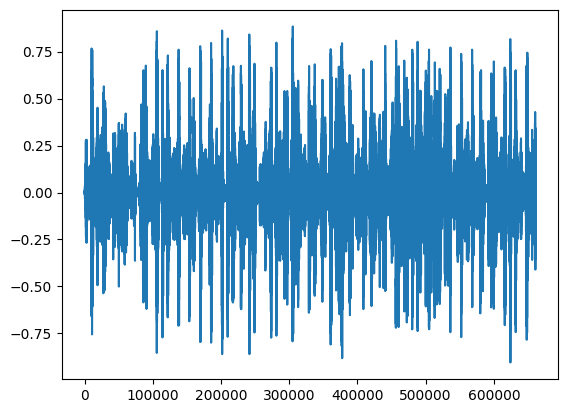

In [26]:
plt.plot(y_percussive)
plt.show()

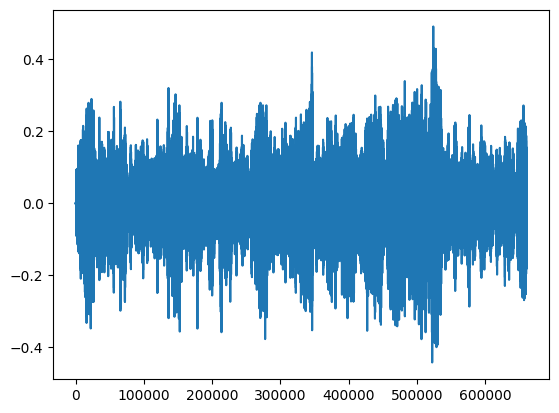

In [27]:
plt.plot(y_harmonic)
plt.show()

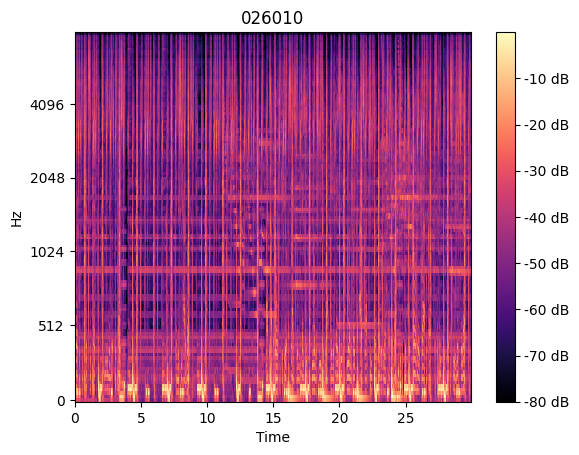

In [28]:
mel = librosa.feature.melspectrogram(y=y1, sr=sr1,n_fft=2048, hop_length=512)
mel = librosa.power_to_db(mel, ref=np.max)
librosa.display.specshow(mel, y_axis='mel', fmax=8000, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title(str('026010'))
plt.show()

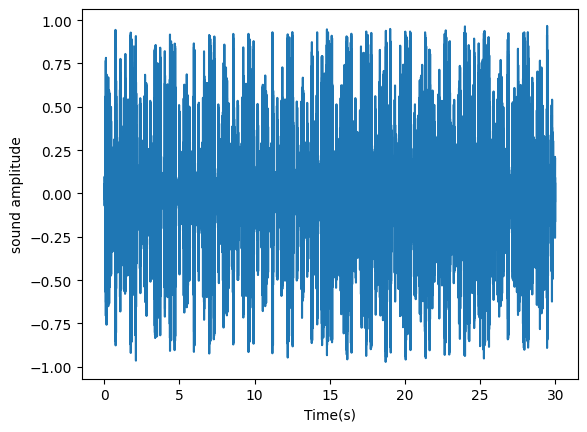

In [29]:
time = np.arange(0,len(y1))/sr1
fig, ax = plt.subplots()
ax.plot(time,y1)
ax.set(xlabel='Time(s)',ylabel='sound amplitude')
plt.show()

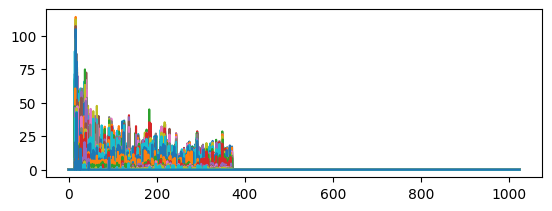

(1025, 1291)

In [44]:
pitches, magnitudes = librosa.piptrack(y=y1, sr=sr1)

plt.subplot(212)
plt.plot(magnitudes)

plt.show()
pitches.shape

In [33]:
tempo, beat_frames = librosa.beat.beat_track(y=y1, sr=sr1)
y_harmonic, y_percussive = librosa.effects.hpss(y1)
print('Estimated tempo: {:.2f} beats per minute'.format(tempo))

Estimated tempo: 198.77 beats per minute


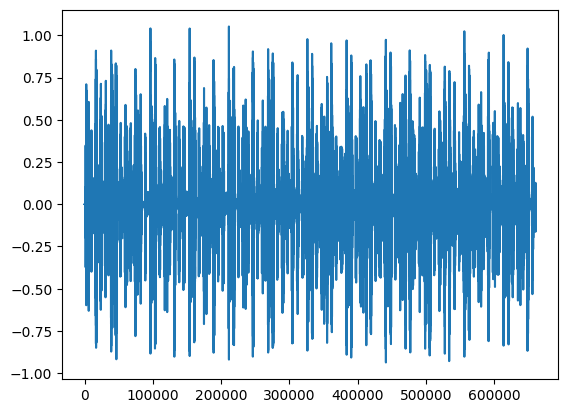

In [34]:
plt.plot(y_percussive)
plt.show()

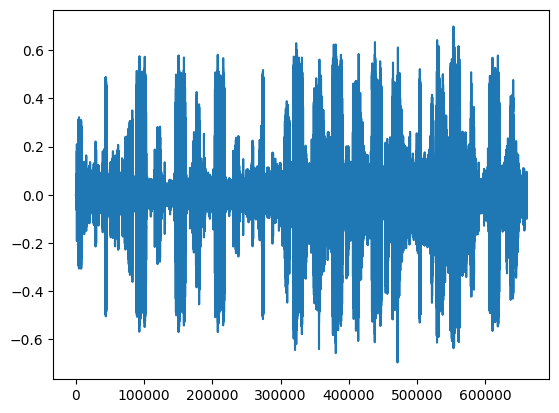

In [35]:
plt.plot(y_harmonic)
plt.show()

In [8]:
from os import listdir
from os.path import isfile, join
import glob
trackfolders = [f for f in listdir(DATA_SET_FOLDER)]
trackfolders
tracks = []
for track in trackfolders:
    root_dir_name = os.path.join(DATA_SET_FOLDER,track)
    for file in glob.glob("*", root_dir=root_dir_name):
        file = os.path.join(track, file)
        tracks.append(file)
    


In [9]:
tracks

['000\\000002.mp3',
 '000\\000005.mp3',
 '000\\000010.mp3',
 '000\\000140.mp3',
 '000\\000141.mp3',
 '000\\000148.mp3',
 '000\\000182.mp3',
 '000\\000190.mp3',
 '000\\000193.mp3',
 '000\\000194.mp3',
 '000\\000197.mp3',
 '000\\000200.mp3',
 '000\\000203.mp3',
 '000\\000204.mp3',
 '000\\000207.mp3',
 '000\\000210.mp3',
 '000\\000211.mp3',
 '000\\000212.mp3',
 '000\\000213.mp3',
 '000\\000255.mp3',
 '000\\000256.mp3',
 '000\\000368.mp3',
 '000\\000424.mp3',
 '000\\000459.mp3',
 '000\\000534.mp3',
 '000\\000540.mp3',
 '000\\000546.mp3',
 '000\\000574.mp3',
 '000\\000602.mp3',
 '000\\000615.mp3',
 '000\\000620.mp3',
 '000\\000621.mp3',
 '000\\000625.mp3',
 '000\\000666.mp3',
 '000\\000667.mp3',
 '000\\000676.mp3',
 '000\\000690.mp3',
 '000\\000694.mp3',
 '000\\000695.mp3',
 '000\\000704.mp3',
 '000\\000705.mp3',
 '000\\000706.mp3',
 '000\\000707.mp3',
 '000\\000708.mp3',
 '000\\000709.mp3',
 '000\\000714.mp3',
 '000\\000715.mp3',
 '000\\000716.mp3',
 '000\\000718.mp3',
 '000\\000777.mp3',


In [38]:
len(tracks)

7989

In [2]:

for track in tracks:
    plt.rcParams["figure.figsize"] = [7.50, 3.50]
    plt.rcParams["figure.autolayout"] = True

    fig, ax = plt.subplots()

    hl = 512 # number of samples per time-step in spectrogram
    hi = 128 # Height of image
    wi = 384 # Width of image


    path_name = os.path.join(DATA_SET_FOLDER,track)
    y, sr = librosa.load(path_name)
    window = y[0:wi*hl]
    S = librosa.feature.melspectrogram(y=window, sr=sr, n_mels=hi, fmax=8000, hop_length=hl)
    S_db = librosa.power_to_db(S, ref=np.max)
    img = librosa.display.specshow(S_db, x_axis='time', y_axis='mel', sr=sr, fmax=8000, ax=ax)
    
    save_file_name = os.path.join(IMAGE_DATASET_FOLDER,track[4:-4])
    plt.savefig(save_file_name)
    

NameError: name 'tracks' is not defined